In [1]:
import re
import requests

#### 전방탐색
- 전방탐색(Positive Lookahead)은 정규식에서 매치할 문자열의 앞쪽을 일치시키는 것입니다. 하지만 일치시킨 문자열은 검색 대상에서 제외됩니다. 이를 사용하면 특정 문자열 패턴 뒤에 오는 문자열을 매치할 때 유용합니다.

#### 긍정탐색

긍정 탐색은 조건을 충족하는 부분을 찾을 때 사용됩니다. 이것은 일치하는 부분을 포함하고 일치하지 않는 부분을 탐색 결과에서 제외합니다. 긍정 탐색은 (?=...) 구문을 사용하여 정규식 안에서 표현됩니다. 

#### 부정탐색

부정 탐색은 일치하지 않는 부분을 찾을 때 사용됩니다. 이것은 일치하지 않는 부분을 포함하지만, 탐색 결과에서 일치하는 부분을 제외합니다. 부정 탐색은 (?!...) 구문을 사용하여 정규식 안에서 표현됩니다.

In [2]:
text = 'http://google.com'

p = re.compile(r'.+:')

m = p.search(text)

print(m.group())
print()

p = re.compile(r'.+(?=:)') # :에 대당되는 문자열이 정규식 엔진에 의해 소모되지 않음(검색에는 포함되지만 결과에는 제외)
m1 = p.search(text)

print(m1.group())

http:

http


In [3]:
# text 에서 쉼표 다음에 공백이 오는 부분만 매치
# re.findall() 메소드를 사용하여 전체 문자열에서 정규식 패턴과 일치하는 모든 부분 탐색
# 일치하는 문자열은 전방탐색 패턴에 해당하는 단어를 제외한 부분만 추출

In [4]:
# text에서 ', '로 출력하세요

text = 'I love Python, Java, and Java script'

p = re.compile(r', (?=\w+)')

m = p.search(text)

m.group()

', '

In [83]:
list1 = ['foo.exe', 'autoexec.bat', 'sendmail.cf']

p = re.compile('.*[.].*$')

for i in list1 :
    
    if p.match(i):
        print(i)
    

foo.exe
autoexec.bat
sendmail.cf


In [6]:
# 상기 매칭에서 부정탐색을 사용하여 sendmail.cf만 출력하세요

p = re.compile('.*[.](?!bat$|exe$)')

for i in list1 :
    
    if p.match(i):
        print(i)

sendmail.cf


### 과제1

아래 text에서 ['file2.pdf', 'file3.docx', 'file4.xlsx']만 출력하세요

In [37]:
text = 'file1.txt, file2.pdf, file3.dock, file4.xlsx'

p = re.compile(r'\w+[.](?!txt)\w+')

m = p.findall(text)

print(m)

['file2.pdf', 'file3.dock', 'file4.xlsx']


In [8]:
# (?<=@)는 전방탐색으로 @ 기호 이후에 오는 문자열을 찾음
#[\w]+는 도메인 이름을 나타내는 패턴으로 알파벳 대소문자 숫자 밑줄 마침표를 포함
#(?!\d+)는 부정탐색으로 도메인 이름 이후에 오는 .com .org 등의 문자열을 제외

text = 'example@gmail.com'

p = r'(?<=@)[\w.]+(?!\d+)'

m = re.search(p, text)

print(m.group())

gmail.com


In [9]:
# 그룹핑된 문자열에 이름 붙이기 : 확장 구문 (?P<name>\w+)

text = 'park 010-1234-4567'

p = re.compile(r'(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)')

m = p.search(text)
m.group('name')

'park'

In [10]:
# 그룹명 word를 이용하여 'the the'를 출력하세요

text = 'Paris in the the spring'

p = re.compile(r'(?P<word>\w+)\s+\1')

m = p.search(text)

m.group()

'the the'

### 과제2

아래 email에서 정규표현식 (?<=@)를 사용해서 example만 출력하세요

In [11]:
email = 'john.doe@example.com'

p = re.compile(r'(?<=@)\w+')

m = p.search(email)

print(m.group())

example


In [12]:
# sub 메서드를 사용하면 정규식과 매치되는 부분을 다른 문자로 쉽게 바꿀수 있음

text = 'blue socks and red shoes'

p = re.compile('(blue|white|red)')
print(p.sub('color', text))
print(p.sub('color', text, count = 1)) # 횟수를 제어할수 있음
print(p.subn('color', text)) # 반환 결과를 튜플로 돌려주고 바꾸기 회수도 표현

color socks and color shoes
color socks and red shoes
('color socks and color shoes', 2)


In [13]:
# 12345abc 에서 sub 사용해서 abc만 출력하세요

text = '12345abc'

p = re.compile(r'\d+')

m = p.sub('', text)

print(m)

abc


In [14]:
# 12345abc 에서 sub 사용해서 12345만 출력하세요

text = '12345abc'

p = re.compile(r'\D+')

m = p.sub('', text)

print(m)

12345


In [15]:
# 이름 + 전화번화의 문자열을 전화번호 + 이름으로 바꾸는 예

text = 'park 010-1234-5678'

p = re.compile(r'(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)')

print(p.sub('\g<phone> \g<name>', text))

010-1234-5678 park


In [16]:
# 그룹 이름대신 참조 번호를 사용 할수 있음

print(p.sub('\g<2> \g<1>', text))

010-1234-5678 park


In [17]:
# sub 메서드의 매개변수로 넣기

def hexrepl(match) :
    value = int(match.group())
    
    return hex(value)

text = 'Call 65490 for printing, 49152 for user code'

p = re.compile(r'\d+')

p.sub(hexrepl, text)

'Call 0xffd2 for printing, 0xc000 for user code'

### 과제3 

사용자 함수를 생성하여 sub 메서드의 매개 변수로 적용하는 사례를 작성하세요

In [68]:
def time_to_second(match) :
    value = int(match.group(1)) / 3600 
    
    return str(int(value)) + ' o\'clcok'

text = "It's time to sleep. It's 43200 seconds, so go to bed. We will wake up at 25200 seconds."

p = re.compile(r'(\d+) seconds')

p.sub(time_to_second, text)

"It's time to sleep. It's 12 o'clcok, so go to bed. We will wake up at 7 o'clcok."

정규표현식에서 greedy와 nongreedy는 매칭(matching) 과정에서 사용되는 용어입니다.

- Greedy: 가능한 가장 긴 문자열을 매칭하는 방식입니다. 즉, 매칭할 수 있는 최대한의 문자열을 선택합니다. 예를 들어, .*는 0개 이상의 어떤 문자든지 가능한 최대한의 문자열을 매칭합니다.

- Nongreedy (또는 Lazy): 가능한 가장 짧은 문자열을 매칭하는 방식입니다. 즉, 매칭할 수 있는 최소한의 문자열만 선택합니다. 예를 들어, .*?는 0개 이상의 어떤 문자든지 가능한 최소한의 문자열을 매칭합니다.

In [19]:
text = 'There are 123 apples and 456 bananas'

p_greedy = re.compile(r'\d+')
p_nongreedy = re.compile(r'\d+?')

mg = p_greedy.search(text)
mng = p_nongreedy.search(text)

print(mg.group())
print(mng.group())

123
1


In [20]:
# 주어진 s 에서 최대한의 문자열인 <html><head><title>Title</title>  과 최소한의 <html>를 각각 출력하세요

s = '<html><head><title>Title</title>'

p_g = re.compile(r'<.+>')
p_ng = re.compile(r'<.+?>')

mg = p_g.search(s)
mng = p_ng.search(s)

print(mg.group())
print(mng.group())

<html><head><title>Title</title>
<html>


In [21]:
p_g = re.compile(r'(<[^<]+)+')
p_ng = re.compile(r'(<[^<]+)+?')

mg = p_g.search(s)
mng = p_ng.search(s)

print(mg.group())
print(mng.group())

<html><head><title>Title</title>
<html>


# 웹 개발 언어

데이터 수집을 할 때 웹 개발 언어를 알아야 하는 이유는 웹 페이지에서 데이터를 가져오기 위해서입니다.

예를 들어, 어느 날 친구가 당신에게 "너는 컴퓨터가 얼마나 똑똑한지 알아?"라고 물어봤다고 생각해보세요. 당신은 궁금해졌고, 컴퓨터가 얼마나 똑똑한지 알아보기로 했습니다. 그래서 당신은 인터넷 검색을 통해 컴퓨터의 지능에 대한 정보를 찾아보기로 했습니다.

하지만 인터넷에는 수많은 정보가 있습니다. 모든 정보를 일일이 읽어보기에는 시간이 너무 오래 걸리죠. 이때 웹 개발 언어를 이해하고 파이썬 라이브러리를 사용하면 웹 페이지에서 필요한 정보만을 자동으로 추출할 수 있습니다.

## HTML, CSS, Javascript는 웹 개발에 사용되는 세 가지 주요 언어입니다.

- HTML은 HyperText Markup Language의 약자로 웹 페이지의 구조를 만들기 위한 언어입니다. HTML은 웹 페이지의 내용과 구조를 정의하는 데 사용됩니다.

- CSS는 Cascading Style Sheets의 약자로 웹 페이지의 디자인과 레이아웃을 만들기 위한 스타일시트입니다. CSS는 HTML로 작성된 웹 페이지의 외형을 예쁘게 바꿀 수 있습니다. 글자 색상과 배경 색상, 배치 등을 자유롭게 변경할 수 있습니다.

- Javascript는 웹 페이지를 프로그래밍하기 위한 언어입니다. Javascript를 사용하면 웹 페이지에 동적인 기능을 추가할 수 있습니다.

#### JavaScript
- 웹 사이트의 기능을 넣어줌. script 태그를 이용하여 작성. head or body 하단에 위치
- js를 이용하여 HTML 코드를 생성. 크롤러로 분석하기 가장 어려운 부분임
- DOM(Document Object Model)이란 HTML을 시각적으로 쉽게 표현하기 위해 만든 객체로 크롤러 만들 때 중요
- 데이터를 수집하기 위해 DOM을 이용해 데이터에 접근한 후 해당 데이터 수집
- 웹 브라우저는 HTML 코드를 가져온 후 JavaScript를 실행시킨 결과를 보여줌
- 소스 보기 페이지에 수집하고자 하는 요소가 없다면 네트워크 탭을 이용, 서버에서 데이터를 받아오는 지 확인
- 그렇지 않은 경우 셀레니움을 사용하여 해결

http://www.tcpschool.com/javascript/js_intro_basic

# 데이터 수집용 라이브러리


파이썬 데이터 수집용 라이브러리는 크게 두가지로 분류할 수 있습니다.

1. 파이썬 표준 라이브러리 모듈: 파이썬에서 기본적으로 제공되는 라이브러리 모듈로, urllib, xml, html.parser, json 등이 이에 해당합니다.

2. 외부 라이브러리 모듈: 다른 개발자가 만들어 공개한 라이브러리 모듈로, requests, BeautifulSoup, Scrapy, Selenium 등이 이에 해당합니다.


이러한 라이브러리 모듈들을 활용하면 데이터 수집과 가공을 빠르고 쉽게 수행할 수 있습니다.

- BeautifulSoup 모듈: HTML, XML 문서를 파싱하는 데 사용되는 라이브러리입니다.
- Scrapy 모듈: 웹 크롤링을 위해 만들어진 라이브러리로, 대규모 웹사이트에서 데이터 수집을 효과적으로 수행할 수 있습니다.
- Requests 모듈: HTTP 요청을 보내고 받는 데 사용되는 라이브러리입니다. REST API를 사용할 때 자주 사용됩니다.
- Selenium 모듈: 웹 브라우저를 제어하여 데이터를 수집하는 데 사용됩니다. 특히 동적인 웹사이트에서 데이터를 수집할 때 유용합니다.

### 파이썬 표준 라이브러리 모듈

- urllib 모듈: URL을 다루는 라이브러리로, 웹에서 데이터를 가져오는 데 사용됩니다.
- xml 모듈: XML 문서를 다루는 라이브러리로, XML 데이터를 파싱하는 데 사용됩니다.
- json 모듈: JSON(JavaScript Object Notation) 형식의 데이터를 다루는 라이브러리로, JSON 데이터를 파싱하는 데 사용됩니다.
- csv 모듈: CSV(Comma Separated Values) 형식의 데이터를 다루는 라이브러리로, CSV 데이터를 파싱하는 데 사용됩니다.
- datetime 모듈: 날짜와 시간을 다루는 라이브러리로, 날짜와 시간을 파싱하고 조작하는 데 사용됩니다.
- collections 모듈: 컨테이너 데이터 타입을 다루는 라이브러리로, 리스트, 튜플, 딕셔너리 등을 다루는 데 사용됩니다.
https://docs.python.org/ko/3/py-modindex.html#cap-o

### urllib

urllib 모듈이란: 파이썬의 표준 모듈로써 URL을 다루기 위한 모듈 패키지
- 설치가 필요하지 않고 import urllib로 활용
- requests 모듈과 마찬가지로 URL과 관련된 여러가지 기능들을 제공

하위모듈
- request : URL을 열고 읽는 모듈(HTTP 요청)
- error : request 모듈에서 발생하는 에러들을 포함하는 모듈
- parse : URL을 파싱하는 모듈(URL 해석 및 조작)
- robots.txt 파일을 파싱하는 모듈

requests 모듈 : pip install requests 명령어로 설치, anaconda를 설치하면 기본 설치
- http는 요청과 응답으로 이루어져 있음
- 요청/응답 구조
 - 요청
      * GET : 정보를 가져오기 위해 요청
      * POST: 새로운 정보를 보내기 위해 요청
      * PUT: 수정할 정보를 보내기 위해 요청
      * DELETE: 정보를 삭제하기 위해 요청
 - 응답
      * 1XX: 요청을 받았고 작업 진행 중
      * 2XX: 사용자의 요청이 성공적으로 수행 됨
      * 3XX: 요청은 완료되었으나 리다이렉션이 필요
      * 4XX: 사용자의 요청이 잘못됨
      * 5XX: 서버에 오류가 발생함
- import requests로 모듈 호출 후 사용

In [22]:
import requests

URL = 'http://www.naver.com/'

response = requests.get(URL)
print(response)

html_data = response.text

# html_data

<Response [200]>


In [23]:
import urllib

request = urllib.request.Request(URL)

print(request)
print(request.full_url)
print(request.type)
print(request.host)

http://www.naver.com/
http
www.naver.com


In [24]:
# urlopen() : 해당 url을 열기 응답 데이터는 바이트 형식의 HTTPResponse 객체

request1 = urllib.request.urlopen(request)
request2 = urllib.request.urlopen(URL)


print(request1)
print(request2)

In [25]:
print(request2.getheaders(), '\n')
print(request2.geturl(), '\n')
print(request2.read(30), '\n')
print(request2.read(10), '\n')

[('Server', 'NWS'), ('Date', 'Wed, 26 Apr 2023 12:37:00 GMT'), ('Content-Type', 'text/html; charset=UTF-8'), ('Transfer-Encoding', 'chunked'), ('Connection', 'close'), ('Set-Cookie', 'PM_CK_loc=0c6c95d06f714b422cb6167b3a64e5fd705572ebec78bb0d50913b52fbccf5a8; Expires=Thu, 27 Apr 2023 12:37:00 GMT; Path=/; HttpOnly'), ('Cache-Control', 'no-cache, no-store, must-revalidate'), ('Pragma', 'no-cache'), ('P3P', 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"'), ('X-Frame-Options', 'DENY'), ('X-XSS-Protection', '1; mode=block'), ('Strict-Transport-Security', 'max-age=63072000; includeSubdomains'), ('Referrer-Policy', 'unsafe-url')] 

https://www.naver.com/ 

b'\n<!doctype html>              ' 

b'          ' 



In [26]:
print(request2.read(500).decode('utf-8'), '\n')

  <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://w 



In [27]:
# 바이트 형식의 데이터를 원하는 형식으로 변환

URL = 'http://www.naver.com/'

response = urllib.request.urlopen(URL)

byte_data = response.read(500)

print(byte_data, '\n')

text_data = byte_data.decode('utf-8')
print(text_data)

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <m' 


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="app

In [28]:
# urllib.request.urlretrieve() : 웹상의 이미지를 저장

img_src = 'https://homepages.cae.wisc.edu/~ece533/images/tulips.png'

new_name = 'img.png'

urllib.request.urlretrieve(img_src, new_name)

('img.png', <http.client.HTTPMessage at 0x2080da50a00>)

In [29]:
# 단순한 패턴을 읽을 때에는 복잡한 정규표현식보다는 간단한 parse 모듈을 사용
# 문자열이나 파일등의 입력을 받아서 그것을 더 작은 단위로 쪼개고 분석하여 그 구조를 파악하는 과정

url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai'

parse = urllib.parse.urlparse(url)

print(parse, '\n')
print(parse[0], '\n')
print(parse[1], '\n')
print(parse[2], '\n')
print(parse[3], '\n')
print(parse[4], '\n')
print(parse[5], '\n')

ParseResult(scheme='https', netloc='section.blog.naver.com', path='/Search/Post.naver', params='', query='pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai', fragment='') 

https 

section.blog.naver.com 

/Search/Post.naver 

 

pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai 

 



In [30]:
# urllib.parse.rulsplit()  : url을 5개로 분리하여 반환

url = 'https://blog.naver.com/koreatech91;a=1?b=2#b'

parse1 = urllib.parse.urlparse(url)
parse2 = urllib.parse.urlsplit(url)

print(parse1, '\n')
print(parse2)

ParseResult(scheme='https', netloc='blog.naver.com', path='/koreatech91', params='a=1', query='b=2', fragment='b') 

SplitResult(scheme='https', netloc='blog.naver.com', path='/koreatech91;a=1', query='b=2', fragment='b')


In [69]:
from urllib.parse import urlunparse

url_components = ('https', 'www.example.com', 'path/to/file', '', 'param1=value1&param2=value2', 'section')
url = urlunparse(url_components)
print(url)

https://www.example.com/path/to/file?param1=value1&param2=value2#section


In [88]:
# urllib.parse.urlunparse, urllib.parse.urlunsplit()
# 분리된 url을 다시 합침 튜플로 반환되기 때문에 리스트로 변경하여 활용

url = 'https://blog.naver.com/koreatech91;a=1?b=2#b'

parse1 = urllib.parse.urlparse(url)

parse1_l = list(parse1)

parse1_l[1] = 'blog.daum.net'

unparse1 = urllib.parse.urlunparse(parse1_l)

print(unparse1, '\n')

https://blog.daum.net/koreatech91;a=1?b=2#b 



In [89]:
# urljoin(a, b) : a 와 b url을 합쳐주는 기능 /에 따라 url 주소가 달라짐

url = 'http://naver.com/a/b'

print(urllib.parse.urljoin(url, 'c'))
print(urllib.parse.urljoin(url, '/c'))

http://naver.com/a/c
http://naver.com/c


In [102]:
from bs4 import BeautifulSoup

URL = 'https://search.naver.com/search.naver?query="파이썬"'

req = requests.get(URL)

soup = BeautifulSoup(req.text, 'html.parser')

soup = str(soup)

item = re.findall('[가-힣]+', soup)

m = ' '.join(item)

m[0]

'파'

In [91]:
# quote(), unquote() : 퍼센트 인코딩으로 변환
# 퍼센트 인코딩은 url에 문자를 표현하는 문자 인코딩 방법
# url에 한글이 섞이면 오류 발생

print(urllib.parse.quote('파이썬'))
print(urllib.parse.unquote('%ED%8C%8C%EC%9D%B4%EC%8D%AC'))

url = 'https://search.naver.com/search.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

response = urllib.request.urlopen(url)
byte_data = response.read()
text_data = byte_data.decode('utf-8')

print(text_data)

%ED%8C%8C%EC%9D%B4%EC%8D%AC
파이썬
<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="파이썬 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'파이썬'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'파이썬'의 네이버 통합검색 결과입니다."> <title>파이썬 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230420.css"> <link rel="style

In [92]:
# 홈페이지를 로컬에 파일로 저장

request = urllib.request.Request('http://www.naver.com')

data = urllib.request.urlopen(request).read()

f = open('pc.html', 'wb')
f.write(data)
f.close()


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
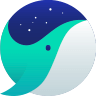
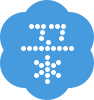

In [93]:
with open('pc.html', 'rb') as f :
    data = f.read().decode('utf-8')
    print(data)

### 과제 4

네이버 사이트에서 아래 query_list를 검색할 수 있는 url을 생성하세요(퍼센트 인코딩 변환 )

query_list = ['파이썬', '웹 크롤링', '빅데이터', 'python']

for 문 사용

https://search.naver.com/search.naver?query=

In [94]:
url = 'https://search.naver.com/search.naver?query='

query_list = ['파이썬', '웹 크롤링', '빅데이터', 'python']

print('파이썬 : ' ,urllib.parse.quote(query_list[0]))
print('웹 크롤링 : ' ,urllib.parse.quote(query_list[1]))
print('빅데이터 : ' ,urllib.parse.quote(query_list[2]))
print('python : ' ,urllib.parse.quote(query_list[3]), '\n')

for i in query_list :
    
    m = urllib.parse.urljoin(url, urllib.parse.quote(i))
    
    print(m)

파이썬 :  %ED%8C%8C%EC%9D%B4%EC%8D%AC
웹 크롤링 :  %EC%9B%B9%20%ED%81%AC%EB%A1%A4%EB%A7%81
빅데이터 :  %EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0
python :  python 

https://search.naver.com/%ED%8C%8C%EC%9D%B4%EC%8D%AC
https://search.naver.com/%EC%9B%B9%20%ED%81%AC%EB%A1%A4%EB%A7%81
https://search.naver.com/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0
https://search.naver.com/python


In [95]:
# jason 형식의 데이터 가져오기

response = requests.get('https://raw.githubusercontent.com/naver/naver-openapi-guide/draft/naver-openapi-swagger.json')
result = response.json()

print(type(result), '\n')

result

<class 'dict'> 



{'swagger': '2.0',
 'info': {'description': 'Naver Open API - Restful spec. You can find out more about Naver Open API at [https://developers.naver.com](https://developers.naver.com)',
  'version': '1.2.0',
  'title': 'Naver Open API',
  'termsOfService': 'https://developers.naver.com/products/terms'},
 'host': 'openapi.naver.com',
 'basePath': '/',
 'tags': [{'name': 'Clova',
   'description': 'Naver A.I platform and APIs',
   'externalDocs': {'description': 'Find out more',
    'url': 'https://developers.naver.com/products/clova/cic'}},
  {'name': 'Papago', 'description': 'Naver Machine Learning Translation APIs'},
  {'name': 'Naver Login', 'description': 'Login with Naver Id'},
  {'name': 'Naver Services',
   'description': 'Naver data trend, search, shorten url, captcha APIs'},
  {'name': 'Maps', 'description': 'Naver Mpas JS, geocode, static map APIs'}],
 'schemes': ['https'],
 'paths': {'/v1/vision/face': {'post': {'tags': ['Clova'],
    'summary': 'Clova Face Recognition (얼굴감지)'

In [96]:
url = 'http://naver.com'

response = requests.get(url)
html_data = response.text

print(html_data.find('바로가기'))
print(html_data[5883 : 5887])

5883
바로가기


In [97]:
# '네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요'를 출력하세요

url = 'http://www.naver.com'

response = requests.get(url)
html_data = response.text

print(html_data.find('네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요'))
print(html_data[365 : 398])

365
네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"


### 과제5

url = 'http://www.daum.net' 에서 아래 방법을 이용해서 한글 데이터만 출력하세요

- 표준 모듈을 이용
- 외부 라이브러리를 이용

In [98]:
# 표준 모듈

url = 'http://www.daum.net'

html_data = urllib.request.urlopen(url).read().decode('utf-8')
data = re.findall(r'[가-힣]+', html_data)

print(data)

['이용자', '선택권을', '강화한', '뉴스', '세상의', '모든', '정보를', '연결하는', '검색', '에서', '나의', '관심', '콘텐츠를', '즐겨보세요', '이용자', '선택권을', '강화한', '뉴스', '세상의', '모든', '정보를', '연결하는', '검색', '에서', '나의', '관심', '콘텐츠를', '즐겨보세요', '미디어다음', '메일', '다음', '미디어', '카카오', '소셜', '채널', '뉴스', '코로나', '현황', '포토', '연재', '뉴스홈', '팩트체크', '환율', '환율', '코스피', '증시', '편성', '편성표', '오늘의운세', '운세', '오늘의', '리그', '수갑', '풀어', '야', '맞짱', '뜨자', '경찰관', '배', '걷어찬', '촉법소년', '이슈시개', '노컷뉴스', '노컷뉴스', '하모니', '이슈시개', '노컷뉴스', '강지윤', '기자', '노컷뉴스', '언론사픽', '열독률', '랭크다운', '저품질', '타이틀', '언론사픽', '주요뉴스', '랭크업', '유레이더', '추가점수', '사회', '이슈시개', '언론사픽', '유통풀제외', '언론사픽', '유통풀제외', '부적합', '포토', '슬롯', '사용', '승인', '포토', '승인취소', '커뮤니티', '발', '기사', '랭크다운', '온라인', '화제', '노컷뉴스', '하모니', '노컷뉴스', '강지윤', '기자', '사회', '뉴스', '포토', '뉴스', '언론사픽', '열독률', '랭크다운', '저품질', '타이틀', '언론사픽', '주요뉴스', '랭크업', '유레이더', '추가점수', '사회', '이슈시개', '언론사픽', '유통풀제외', '언론사픽', '유통풀제외', '부적합', '포토', '슬롯', '사용', '승인', '포토', '승인취소', '커뮤니티', '발', '기사', '랭크다운', '온라인', '화제', '양식장서', '낙지', '해삼', '싹쓸이', '하고', '좋은', '일', 

In [122]:
# 외부 라이브러리

response = requests.get(url)

html = response.text

soup = BeautifulSoup(html, 'html.parser')
soup = str(soup)
#print(soup)

item = re.findall(r'[가-힣]+', soup)

m = ' '.join(item)

m

''

### 인덱싱

In [100]:
# 출력값이 k 기 k-digital training 7기 K-Digital Training 7기 나오도록하기

text = 'k-digital training 1기'

print(text[0])
print(text[20])
print(text.replace('1', '7'))
print(text.title().replace('1', '7'))

k
기
k-digital training 7기
K-Digital Training 7기
